# 使用QQQ模擬TQQQ的獲利

In [1]:
import pandas as pd
df = pd.read_csv('./QQQ.csv')

In [2]:
df['changeRate'] = (df['Close'] - df['Close'].shift()) / df['Close'].shift()
df['TQQQ'] = df['changeRate'] * 3
df[:5]

,Date,Open,High,Low,Close,Adj Close,Volume,changeRate,TQQQ
0,2000-03-27,118.000000,119.5000,117.125,117.75,102.355965,11752600,NaN,NaN
1,2000-03-28,116.984375,117.8125,113.125,114.75,99.748192,18336300,-0.025478,-0.076433
2,2000-03-29,115.375000,115.4375,110.000,110.00,95.619179,27189500,-0.041394,-0.124183
3,2000-03-30,107.250000,112.7500,103.500,107.25,93.228668,42328700,-0.025000,-0.075000
4,2000-03-31,108.140625,110.6250,104.000,109.50,95.184540,31349900,0.020979,0.062937


### TQQQ 從2000年開始
初始資金為`1`,每年增加 `1/2`

In [3]:
initCash = 1
cash = initCash
crr = [initCash]
addYear = 2000
for index, data in df[1:].iterrows():
    if data['Date'].startswith(str(addYear)):
        addYear+=1
        cash += initCash / 2
    rate = data['TQQQ']
    cash *= (rate+1)
    crr.append(cash)
df['Cash'] = crr

count    5313.000000
mean       51.874022
std       102.951998
min         0.031936
25%         2.182967
50%         6.646764
75%        47.544492
max       636.864962
Name: Cash, dtype: float64


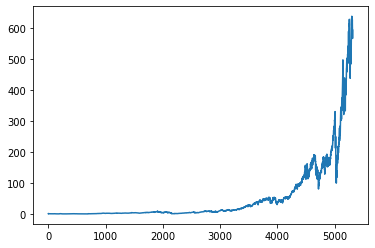

In [4]:
print(df['Cash'].describe())
df['Cash'].plot()